<a href="https://colab.research.google.com/github/ashaykargaonkar/Projects/blob/main/AmesHousing/%5BMultiple_Regression_(Python_%26_R)%5D_AmesHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [ ]:
#X = dataset.drop(['SalePrice'], axis=1)
#y = dataset['SalePrice']

In [ ]:
X = train

***Processing Id variable***

In [ ]:
X = X.drop(columns='Id')

***Processing MSSubClass variable***

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES                               (Type1)
        30	1-STORY 1945 & OLDER                                          (Type2)
        40	1-STORY W/FINISHED ATTIC ALL AGES                             (Type3)
        45	1-1/2 STORY - UNFINISHED ALL AGES                             (Type4)
        50	1-1/2 STORY FINISHED ALL AGES                                 (Type5)
        60	2-STORY 1946 & NEWER                                          (Type6)
        70	2-STORY 1945 & OLDER                                          (Type7)
        75	2-1/2 STORY ALL AGES                                          (Type8)
        80	SPLIT OR MULTI-LEVEL                                          (Type9)
        85	SPLIT FOYER                                                   (Type10)
        90	DUPLEX - ALL STYLES AND AGES                                  (Type11)
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER         (Type12)
       150	1-1/2 STORY PUD - ALL AGES                                    (Type13)
       160	2-STORY PUD - 1946 & NEWER                                    (Type14)
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                       (Type15)
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES                     (Type16)

In [ ]:
print(X.MSSubClass.unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


In [ ]:
sum(X.MSSubClass.isna())

0

In [ ]:
X['MSSubClass'] = X['MSSubClass'].astype(str)

In [ ]:
#Renaming the different MSSubClasses appropriately

X['MSSubClass'] = X['MSSubClass'].replace(['20'],'Type1')
X['MSSubClass'] = X['MSSubClass'].replace(['30'],'Type2')
X['MSSubClass'] = X['MSSubClass'].replace(['40'],'Type3')
X['MSSubClass'] = X['MSSubClass'].replace(['45'],'Type4')
X['MSSubClass'] = X['MSSubClass'].replace(['50'],'Type5')
X['MSSubClass'] = X['MSSubClass'].replace(['60'],'Type6')
X['MSSubClass'] = X['MSSubClass'].replace(['70'],'Type7')
X['MSSubClass'] = X['MSSubClass'].replace(['75'],'Type8')
X['MSSubClass'] = X['MSSubClass'].replace(['80'],'Type9')
X['MSSubClass'] = X['MSSubClass'].replace(['85'],'Type10')
X['MSSubClass'] = X['MSSubClass'].replace(['90'],'Type11')
X['MSSubClass'] = X['MSSubClass'].replace(['120'],'Type12')
X['MSSubClass'] = X['MSSubClass'].replace(['150'],'Type13')
X['MSSubClass'] = X['MSSubClass'].replace(['160'],'Type14')
X['MSSubClass'] = X['MSSubClass'].replace(['180'],'Type15')
X['MSSubClass'] = X['MSSubClass'].replace(['190'],'Type16')

In [ ]:
print(X.MSSubClass.unique())

['Type6' 'Type1' 'Type7' 'Type5' 'Type16' 'Type4' 'Type11' 'Type12'
 'Type2' 'Type10' 'Type9' 'Type14' 'Type8' 'Type15' 'Type3']


In [ ]:
X = pd.get_dummies(X, columns=['MSSubClass'])
X

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MSSubClass_Type15,MSSubClass_Type16,MSSubClass_Type2,MSSubClass_Type3,MSSubClass_Type4,MSSubClass_Type5,MSSubClass_Type6,MSSubClass_Type7,MSSubClass_Type8,MSSubClass_Type9
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,0,0,0
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,0,0,0
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,1,0,0
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,0,0,0
1456,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1457,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,1,0,0
1458,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0


***Processing MSZoning variable***

In [ ]:
X.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
X = pd.get_dummies(X, columns=['MSZoning'])

***Processing LotFrontage variable***

In [ ]:
X.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
sum(X.LotFrontage.isna())

259

In [ ]:
X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
X['LotFrontage'] = X['LotFrontage'].astype(int)

***Processing LotArea variable***

In [ ]:
print(X.LotArea)

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64


***Processing Street variable***

In [ ]:
print(X.Street.unique())

['Pave' 'Grvl']


In [ ]:
X = pd.get_dummies(X, columns=['Street'])

***Processing Alley variable***

In [ ]:
print(X.Alley.unique())

[nan 'Grvl' 'Pave']


In [ ]:
X.Alley = X.Alley.replace(np.nan, 'None')

In [ ]:
X['Alley'] = X['Alley'].astype(str)
X = pd.get_dummies(X, columns=['Alley'])

***Processing LotShape variable***

In [ ]:
print(X.LotShape.unique())
sum(X.LotShape.isna())

['Reg' 'IR1' 'IR2' 'IR3']


0

In [ ]:
X['LotShape'] = X['LotShape'].astype(str)
X = pd.get_dummies(X, columns=['LotShape'])

***Processing LandContour variable***

In [ ]:
print(X.LandContour.unique())

['Lvl' 'Bnk' 'Low' 'HLS']


In [ ]:
X['LandContour'] = X['LandContour'].astype(str)
X = pd.get_dummies(X, columns=['LandContour'])

***Processing Utilities variable***

In [ ]:
print(X.Utilities.unique())

['AllPub' 'NoSeWa']


In [ ]:
sum(X.Utilities.isna())

0

In [ ]:
X['Utilities'] = X['Utilities'].astype(str)
X = pd.get_dummies(X, columns=['Utilities'])

***Processing LotConfig variable***

In [ ]:
print(X.LotConfig.unique())

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


In [ ]:
sum(X.LotConfig.isna())

0

In [ ]:
X['LotConfig'] = X['LotConfig'].astype(str)
X = pd.get_dummies(X, columns=['LotConfig'])

***Processing LandSlope variable***

In [ ]:
print(X.LandSlope.unique())

['Gtl' 'Mod' 'Sev']


In [ ]:
sum(X.LandSlope.isna())

0

In [ ]:
X['LandSlope'] = X['LandSlope'].astype(str)
X = pd.get_dummies(X, columns=['LandSlope'])

***Processing Neighborhood variable***

In [ ]:
print(X.Neighborhood.unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [ ]:
sum(X.Neighborhood.isna())

0

In [ ]:
X['Neighborhood'] = X['Neighborhood'].astype(str)
X = pd.get_dummies(X, columns=['Neighborhood'])

***Processing Condition1 variable***

In [ ]:
print(X.Condition1.unique())

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


In [ ]:
sum(X.Condition1.isna())

0

In [ ]:
X['Condition1'] = X['Condition1'].astype(str)
X = pd.get_dummies(X, columns=['Condition1'])

***Processing Condition2 variable***

In [ ]:
print(X.Condition2.unique())

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


In [ ]:
sum(X.Condition2.isna())

0

In [ ]:
X['Condition2'] = X['Condition2'].astype(str)
X = pd.get_dummies(X, columns=['Condition2'])

***Processing BldgType variable***

In [ ]:
print(X.BldgType.unique())

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


In [ ]:
sum(X.BldgType.isna())

0

In [ ]:
X['BldgType'] = X['BldgType'].astype(str)
X = pd.get_dummies(X, columns=['BldgType'])

***Processing HouseStyle variable***

In [ ]:
print(X.HouseStyle.unique())

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [ ]:
sum(X.HouseStyle.isna())

0

In [ ]:
X['HouseStyle'] = X['HouseStyle'].astype(str)
X = pd.get_dummies(X, columns=['HouseStyle'])

***Processing OverallQual variable***

In [ ]:
X.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [ ]:
sum(X.OverallQual.isna())

0

***Processing OverallCond variable***

In [ ]:
X.OverallCond

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64

In [ ]:
sum(X.OverallCond.isna())

0

***Processing YearBuilt variable***

In [ ]:
X.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [ ]:
sum(X.YearBuilt.isna())

0

***Processing YearRemodAdd variable***

In [ ]:
X.YearRemodAdd

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

In [ ]:
sum(X.YearRemodAdd.isna())

0

***Processing RoofStyle variable***

In [ ]:
X.RoofStyle

0       Gable
1       Gable
2       Gable
3       Gable
4       Gable
        ...  
1455    Gable
1456    Gable
1457    Gable
1458      Hip
1459    Gable
Name: RoofStyle, Length: 1460, dtype: object

In [ ]:
sum(X.RoofStyle.isna())

0

In [ ]:
X.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [ ]:
X['RoofStyle'] = X['RoofStyle'].astype(str)
X = pd.get_dummies(X, columns=['RoofStyle'])

***Processing RoofMatl variable***

In [ ]:
X.RoofMatl

0       CompShg
1       CompShg
2       CompShg
3       CompShg
4       CompShg
         ...   
1455    CompShg
1456    CompShg
1457    CompShg
1458    CompShg
1459    CompShg
Name: RoofMatl, Length: 1460, dtype: object

In [ ]:
sum(X.RoofMatl.isna())

0

In [ ]:
X.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [ ]:
X['RoofMatl'] = X['RoofMatl'].astype(str)
X = pd.get_dummies(X, columns=['RoofMatl'])

***Processing Exterior1st variable***

In [ ]:
X.Exterior1st

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CemntBd
1458    MetalSd
1459    HdBoard
Name: Exterior1st, Length: 1460, dtype: object

In [ ]:
sum(X.Exterior1st.isna())

0

In [ ]:
X.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [ ]:
X['Exterior1st'] = X['Exterior1st'].astype(str)
X = pd.get_dummies(X, columns=['Exterior1st'])

***Processing Exterior2nd variable***

In [ ]:
X.Exterior2nd

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Shng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CmentBd
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: object

In [ ]:
sum(X.Exterior2nd.isna())

0

In [ ]:
X.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [ ]:
X['Exterior2nd'] = X['Exterior2nd'].astype(str)
X = pd.get_dummies(X, columns=['Exterior2nd'])

***Processing MasVnrType variable***

In [ ]:
X.MasVnrType

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [ ]:
sum(X.MasVnrType.isna())

8

In [ ]:
X = X.dropna(subset=['MasVnrType'])

In [ ]:
X.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
X['MasVnrType'] = X['MasVnrType'].astype(str)
X = pd.get_dummies(X, columns=['MasVnrType'])

In [ ]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,Foundation,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,65,8450,7,5,2003,2003,196.0,Gd,TA,PConc,...,0,0,0,1,0,0,0,1,0,0
1,80,9600,6,8,1976,1976,0.0,TA,TA,CBlock,...,0,0,0,0,0,0,0,0,1,0
2,68,11250,7,5,2001,2002,162.0,Gd,TA,PConc,...,0,0,0,1,0,0,0,1,0,0
3,60,9550,7,5,1915,1970,0.0,TA,TA,BrkTil,...,0,0,0,0,0,1,0,0,1,0
4,84,14260,8,5,2000,2000,350.0,Gd,TA,PConc,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0.0,TA,TA,PConc,...,0,0,0,1,0,0,0,0,1,0
1456,85,13175,6,6,1978,1988,119.0,TA,TA,CBlock,...,1,0,0,0,0,0,0,0,0,1
1457,66,9042,7,9,1941,2006,0.0,Ex,Gd,Stone,...,0,0,0,0,0,0,0,0,1,0
1458,68,9717,5,6,1950,1996,0.0,TA,TA,CBlock,...,0,0,0,0,0,0,0,0,1,0


***Processing MasVnrArea variable***

In [ ]:
X.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1452, dtype: float64

In [ ]:
X['MasVnrArea'] = X['MasVnrArea'].astype(int)

***Processing ExterQual variable***

In [ ]:
X.ExterQual

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1452, dtype: object

In [ ]:
sum(X.ExterQual.isna())

0

In [ ]:
X.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
X['ExterQual'] = X['ExterQual'].astype(str)
X = pd.get_dummies(X, columns=['ExterQual'])

***Processing ExterCond variable***

In [ ]:
X.ExterCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: ExterCond, Length: 1452, dtype: object

In [ ]:
sum(X.ExterCond.isna())

0

In [ ]:
X.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
X['ExterCond'] = X['ExterCond'].astype(str)
X = pd.get_dummies(X, columns=['ExterCond'])

In [ ]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtQual,BsmtCond,...,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,65,8450,7,5,2003,2003,196,PConc,Gd,TA,...,0,0,0,1,0,0,0,0,0,1
1,80,9600,6,8,1976,1976,0,CBlock,Gd,TA,...,0,0,0,0,1,0,0,0,0,1
2,68,11250,7,5,2001,2002,162,PConc,Gd,TA,...,0,0,0,1,0,0,0,0,0,1
3,60,9550,7,5,1915,1970,0,BrkTil,TA,Gd,...,0,0,0,0,1,0,0,0,0,1
4,84,14260,8,5,2000,2000,350,PConc,Gd,TA,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0,PConc,Gd,TA,...,0,0,0,0,1,0,0,0,0,1
1456,85,13175,6,6,1978,1988,119,CBlock,Gd,TA,...,1,0,0,0,1,0,0,0,0,1
1457,66,9042,7,9,1941,2006,0,Stone,TA,Gd,...,0,1,0,0,0,0,0,1,0,0
1458,68,9717,5,6,1950,1996,0,CBlock,TA,TA,...,0,0,0,0,1,0,0,0,0,1


***Processing Foundation variable***

In [ ]:
X.Foundation

0        PConc
1       CBlock
2        PConc
3       BrkTil
4        PConc
         ...  
1455     PConc
1456    CBlock
1457     Stone
1458    CBlock
1459    CBlock
Name: Foundation, Length: 1452, dtype: object

In [ ]:
sum(X.Foundation.isna())

0

In [ ]:
X.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [ ]:
X['Foundation'] = X['Foundation'].astype(str)
X = pd.get_dummies(X, columns=['Foundation'])

***Processing BsmtQual variable***

In [ ]:
X.BsmtQual

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1452, dtype: object

In [ ]:
sum(X.BsmtQual.isna())

37

In [ ]:
X = X.dropna(subset=['BsmtQual'])

In [ ]:
X.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
X['BsmtQual'] = X['BsmtQual'].astype(str)
X = pd.get_dummies(X, columns=['BsmtQual'])

 ***Processing BsmtCond variable***

In [ ]:
X.BsmtCond

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1415, dtype: object

In [ ]:
sum(X.BsmtCond.isna())

0

In [ ]:
X.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [ ]:
X['BsmtCond'] = X['BsmtCond'].astype(str)
X = pd.get_dummies(X, columns=['BsmtCond'])

***Processing BsmtExposure variable***

In [ ]:
X.BsmtExposure

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1415, dtype: object

In [ ]:
X = X.dropna(subset=['BsmtExposure'])

In [ ]:
sum(X.BsmtExposure.isna())

0

In [ ]:
X.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [ ]:
X['BsmtExposure'] = X['BsmtExposure'].astype(str)
X = pd.get_dummies(X, columns=['BsmtExposure'])

***Processing BsmtFinType1 variable***

In [ ]:
X.BsmtFinType1

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1414, dtype: object

In [ ]:
sum(X.BsmtFinType1.isna())

0

In [ ]:
X.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [ ]:
X['BsmtFinType1'] = X['BsmtFinType1'].astype(str)
X = pd.get_dummies(X, columns=['BsmtFinType1'])

***Processing BsmtFinSF1 variable***

In [ ]:
X.BsmtFinSF1

0       706
1       978
2       486
3       216
4       655
       ... 
1455      0
1456    790
1457    275
1458     49
1459    830
Name: BsmtFinSF1, Length: 1414, dtype: int64

In [ ]:
sum(X.BsmtFinSF1.isna())

0

***Processing BsmtFinType2 variable***

In [ ]:
X.BsmtFinType2

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1414, dtype: object

In [ ]:
X = X.dropna(subset=['BsmtFinType2'])

In [ ]:
sum(X.BsmtFinType2.isna())

0

In [ ]:
X.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
X['BsmtFinType2'] = X['BsmtFinType2'].astype(str)
X = pd.get_dummies(X, columns=['BsmtFinType2'])

***Processing BsmtFinSF2 variable***

In [ ]:
X.BsmtFinSF2

0          0
1          0
2          0
3          0
4          0
        ... 
1455       0
1456     163
1457       0
1458    1029
1459     290
Name: BsmtFinSF2, Length: 1413, dtype: int64

In [ ]:
sum(X.BsmtFinSF2.isna())

0

***Processing BsmtUnfSF variable***

In [ ]:
X.BsmtUnfSF

0       150
1       284
2       434
3       540
4       490
       ... 
1455    953
1456    589
1457    877
1458      0
1459    136
Name: BsmtUnfSF, Length: 1413, dtype: int64

In [ ]:
sum(X.BsmtUnfSF.isna())

0

***Processing TotalBsmtSF variable***

In [ ]:
X.TotalBsmtSF

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1413, dtype: int64

In [ ]:
sum(X.TotalBsmtSF.isna())

0

***Processing Heating variable***

In [ ]:
X.Heating

0       GasA
1       GasA
2       GasA
3       GasA
4       GasA
        ... 
1455    GasA
1456    GasA
1457    GasA
1458    GasA
1459    GasA
Name: Heating, Length: 1413, dtype: object

In [ ]:
sum(X.Heating.isna())

0

In [ ]:
X.Heating.unique()

array(['GasA', 'GasW', 'Grav', 'OthW'], dtype=object)

In [ ]:
X['Heating'] = X['Heating'].astype(str)
X = pd.get_dummies(X, columns=['Heating'])

***Processing HeatingQC variable***

In [ ]:
X.HeatingQC

0       Ex
1       Ex
2       Ex
3       Gd
4       Ex
        ..
1455    Ex
1456    TA
1457    Ex
1458    Gd
1459    Gd
Name: HeatingQC, Length: 1413, dtype: object

In [ ]:
sum(X.HeatingQC.isna())

0

In [ ]:
X['HeatingQC'] = X['HeatingQC'].astype(str)
X = pd.get_dummies(X, columns=['HeatingQC'])

***Processing CentralAir variable***

In [ ]:
X.CentralAir

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1413, dtype: object

In [ ]:
X.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
sum(X.CentralAir.isna())

0

In [ ]:
X['CentralAir'] = X['CentralAir'].astype(str)
X = pd.get_dummies(X, columns=['CentralAir'])

***Processing Electrical variable***

In [ ]:
X.Electrical

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1413, dtype: object

In [ ]:
X.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
X = X.dropna(subset=['Electrical'])

In [ ]:
sum(X.Electrical.isna())

0

In [ ]:
X['Electrical'] = X['Electrical'].astype(str)
X = pd.get_dummies(X, columns=['Electrical'])

***Processing 1stFlrSF variable***

In [ ]:
X.rename(columns = {'1stFlrSF':'FirstFlrSF'}, inplace = True)

In [ ]:
X.FirstFlrSF

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: FirstFlrSF, Length: 1412, dtype: int64

In [ ]:
sum(X.FirstFlrSF.isna())

0

***Processing 2ndFlrSF variable***

In [ ]:
X.rename(columns = {'2ndFlrSF':'SecondFlrSF'}, inplace = True)

In [ ]:
X.SecondFlrSF

0        854
1          0
2        866
3        756
4       1053
        ... 
1455     694
1456       0
1457    1152
1458       0
1459       0
Name: SecondFlrSF, Length: 1412, dtype: int64

In [ ]:
sum(X.SecondFlrSF.isna())

0

***Processing LowQualFinSF variable***

In [ ]:
X.LowQualFinSF

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LowQualFinSF, Length: 1412, dtype: int64

In [ ]:
sum(X.LowQualFinSF.isna())

0

***Processing GrLivArea variable***

In [ ]:
X.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1412, dtype: int64

In [ ]:
sum(X.GrLivArea.isna())

0

***Processing BsmtFullBath variable***

In [ ]:
X.BsmtFullBath

0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1412, dtype: int64

In [ ]:
sum(X.BsmtFullBath.isna())

0

In [ ]:
X.BsmtFullBath.unique()

array([1, 0, 2, 3])

In [ ]:
X['BsmtFullBath'] = X['BsmtFullBath'].astype(str)
X = pd.get_dummies(X, columns=['BsmtFullBath'])

***Processing FullBath variable***

In [ ]:
X.FullBath

0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1412, dtype: int64

In [ ]:
sum(X.FullBath.isna())

0

In [ ]:
X.FullBath.unique()

array([2, 1, 3, 0])

In [ ]:
X['FullBath'] = X['FullBath'].astype(str)
X = pd.get_dummies(X, columns=['FullBath'])

***Processing BsmtHalfBath variable***

In [ ]:
X.BsmtHalfBath

0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1412, dtype: int64

In [ ]:
sum(X.BsmtHalfBath.isna())

0

In [ ]:
X.BsmtHalfBath.unique()

array([0, 1, 2])

In [ ]:
X['BsmtHalfBath'] = X['BsmtHalfBath'].astype(str)
X = pd.get_dummies(X, columns=['BsmtHalfBath'])

***Processing HalfBath variable***

In [ ]:
X.HalfBath

0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    0
1457    0
1458    0
1459    1
Name: HalfBath, Length: 1412, dtype: int64

In [ ]:
sum(X.HalfBath.isna())

0

In [ ]:
X.HalfBath.unique()

array([1, 0, 2])

In [ ]:
X['HalfBath'] = X['HalfBath'].astype(str)
X = pd.get_dummies(X, columns=['HalfBath'])

***Processing BedroomAbvGr variable***

In [ ]:
X.BedroomAbvGr

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1412, dtype: int64

In [ ]:
sum(X.BedroomAbvGr.isna())

0

In [ ]:
X.BedroomAbvGr.unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [ ]:
X['BedroomAbvGr'] = X['BedroomAbvGr'].astype(str)
X = pd.get_dummies(X, columns=['BedroomAbvGr'])

***Processing KitchenAbvGr variable***

In [ ]:
X.KitchenAbvGr

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: KitchenAbvGr, Length: 1412, dtype: int64

In [ ]:
sum(X.KitchenAbvGr.isna())

0

In [ ]:
X.KitchenAbvGr.unique()

array([1, 2, 3, 0])

In [ ]:
X['KitchenAbvGr'] = X['KitchenAbvGr'].astype(str)
X = pd.get_dummies(X, columns=['KitchenAbvGr'])

***Processing KitchenQual variable***

In [ ]:
X.KitchenQual

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    TA
Name: KitchenQual, Length: 1412, dtype: object

In [ ]:
sum(X.KitchenQual.isna())

0

In [ ]:
X.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
X['KitchenQual'] = X['KitchenQual'].astype(str)
X = pd.get_dummies(X, columns=['KitchenQual'])

In [ ]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,65,8450,7,5,2003,2003,196,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80,9600,6,8,1976,1976,0,978,0,284,...,0,0,0,1,0,0,0,0,0,1
2,68,11250,7,5,2001,2002,162,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,1,0,0,0,0,1,0
4,84,14260,8,5,2000,2000,350,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0,0,0,953,...,0,0,0,1,0,0,0,0,0,1
1456,85,13175,6,6,1978,1988,119,790,163,589,...,0,0,0,1,0,0,0,0,0,1
1457,66,9042,7,9,1941,2006,0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,68,9717,5,6,1950,1996,0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


***Processing TotRmsAbvGrd variable***

In [ ]:
X.TotRmsAbvGrd

0       8
1       6
2       6
3       7
4       9
       ..
1455    7
1456    7
1457    9
1458    5
1459    6
Name: TotRmsAbvGrd, Length: 1412, dtype: int64

In [ ]:
sum(X.TotRmsAbvGrd.isna())

0

***Processing Functional variable***

In [ ]:
X.Functional

0        Typ
1        Typ
2        Typ
3        Typ
4        Typ
        ... 
1455     Typ
1456    Min1
1457     Typ
1458     Typ
1459     Typ
Name: Functional, Length: 1412, dtype: object

In [ ]:
sum(X.Functional.isna())

0

In [ ]:
X.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [ ]:
X['Functional'] = X['Functional'].astype(str)
X = pd.get_dummies(X, columns=['Functional'])

***Processing Fireplaces variable***

In [ ]:
X.Fireplaces

0       0
1       1
2       1
3       1
4       1
       ..
1455    1
1456    2
1457    2
1458    0
1459    0
Name: Fireplaces, Length: 1412, dtype: int64

In [ ]:
sum(X.Fireplaces.isna())

0

In [ ]:
X.Fireplaces.unique()

array([0, 1, 2, 3])

In [ ]:
X['Fireplaces'] = X['Fireplaces'].astype(str)
X = pd.get_dummies(X, columns=['Fireplaces'])

***Processing FireplaceQu variable***

In [ ]:
sum(X.FireplaceQu.isna())

657

In [ ]:
X.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
X.FireplaceQu.fillna('None', inplace=True)

In [ ]:
X.FireplaceQu

0       None
1         TA
2         TA
3         Gd
4         TA
        ... 
1455      TA
1456      TA
1457      Gd
1458    None
1459    None
Name: FireplaceQu, Length: 1412, dtype: object

In [ ]:
X['FireplaceQu'] = X['FireplaceQu'].astype(str)
X = pd.get_dummies(X, columns=['FireplaceQu'])

***Processing GarageType variable***

In [ ]:
X.GarageType

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1412, dtype: object

In [ ]:
sum(X.GarageType.isna())

74

In [ ]:
X.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', nan, 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [ ]:
X.GarageType.fillna('None', inplace=True)

In [ ]:
X['GarageType'] = X['GarageType'].astype(str)
X = pd.get_dummies(X, columns=['GarageType'])

***Processing GarageYrBlt variable***

In [ ]:
X.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1412, dtype: float64

In [ ]:
sum(X.GarageYrBlt.isna())

74

In [ ]:
X.GarageYrBlt = X.GarageYrBlt.fillna(X.GarageYrBlt.mean())
X.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1412, dtype: float64

In [ ]:
X['GarageYrBlt'] = X['GarageYrBlt'].astype(int)

***Processing GarageFinish variable***

In [ ]:
X.GarageFinish

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1412, dtype: object

In [ ]:
sum(X.GarageFinish.isna())

74

In [ ]:
X.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [ ]:
X.GarageFinish.fillna('None', inplace=True)

In [ ]:
X['GarageFinish'] = X['GarageFinish'].astype(str)
X = pd.get_dummies(X, columns=['GarageFinish'])

***Processing GarageCars variable***

In [ ]:
X.GarageCars

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1412, dtype: int64

In [ ]:
sum(X.GarageCars.isna())

0

***Processing GarageArea variable***

In [ ]:
X.GarageArea

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1412, dtype: int64

In [ ]:
sum(X.GarageArea.isna())

0

***Processing GarageQual variable***

In [ ]:
X.GarageQual

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1412, dtype: object

In [ ]:
sum(X.GarageQual.isna())

74

In [ ]:
X.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [ ]:
X.GarageQual.fillna('None', inplace=True)

In [ ]:
X['GarageQual'] = X['GarageQual'].astype(str)
X = pd.get_dummies(X, columns=['GarageQual'])

***Processing GarageCond variable***

In [ ]:
X.GarageCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1412, dtype: object

In [ ]:
sum(X.GarageCond.isna())

74

In [ ]:
X.GarageCond.unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [ ]:
X.GarageCond.fillna('None', inplace=True)

In [ ]:
X['GarageCond'] = X['GarageCond'].astype(str)
X = pd.get_dummies(X, columns=['GarageCond'])

***Processing PavedDrive variable***

In [ ]:
X.PavedDrive

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: PavedDrive, Length: 1412, dtype: object

In [ ]:
sum(X.PavedDrive.isna())

0

In [ ]:
X.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

In [ ]:
X['PavedDrive'] = X['PavedDrive'].astype(str)
X = pd.get_dummies(X, columns=['PavedDrive'])

***Processing WoodDeckSF variable***

In [ ]:
X.WoodDeckSF

0         0
1       298
2         0
3         0
4       192
       ... 
1455      0
1456    349
1457      0
1458    366
1459    736
Name: WoodDeckSF, Length: 1412, dtype: int64

In [ ]:
sum(X.WoodDeckSF.isna())

0

***Processing OpenPorchSF variable***

In [ ]:
X.OpenPorchSF

0       61
1        0
2       42
3       35
4       84
        ..
1455    40
1456     0
1457    60
1458     0
1459    68
Name: OpenPorchSF, Length: 1412, dtype: int64

In [ ]:
sum(X.OpenPorchSF.isna())

0

***Processing EnclosedPorch variable***

In [ ]:
X.EnclosedPorch

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1412, dtype: int64

In [ ]:
sum(X.EnclosedPorch.isna())

0

***Processing 3SsnPorch variable***

In [ ]:
X.rename(columns = {'3SsnPorch':'ThreeSsnPorch'}, inplace = True)

In [ ]:
X.ThreeSsnPorch

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: ThreeSsnPorch, Length: 1412, dtype: int64

In [ ]:
sum(X.ThreeSsnPorch.isna())

0

***Processing ScreenPorch variable***

In [ ]:
X.ScreenPorch

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: ScreenPorch, Length: 1412, dtype: int64

In [ ]:
sum(X.ScreenPorch.isna())

0

***Processing PoolArea variable***

In [ ]:
X.PoolArea

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1412, dtype: int64

In [ ]:
sum(X.PoolArea.isna())

0

***Processing PoolQC variable***

In [ ]:
X.PoolQC

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1412, dtype: object

In [ ]:
X.PoolQC.fillna('None', inplace=True)

In [ ]:
X.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
X['PoolQC'] = X['PoolQC'].astype(str)
X = pd.get_dummies(X, columns=['PoolQC'])

***Processing Fence variable***

In [ ]:
X.Fence

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1412, dtype: object

In [ ]:
sum(X.Fence.isna())

1135

In [ ]:
X.Fence.fillna('None', inplace=True)

In [ ]:
X.Fence.unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
X['Fence'] = X['Fence'].astype(str)
X = pd.get_dummies(X, columns=['Fence'])

***Processing MiscFeature variable***

In [ ]:
X.MiscFeature

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1455     NaN
1456     NaN
1457    Shed
1458     NaN
1459     NaN
Name: MiscFeature, Length: 1412, dtype: object

In [ ]:
sum(X.MiscFeature.isna())

1361

In [ ]:
X.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
X.MiscFeature.fillna('None', inplace=True)

In [ ]:
X['MiscFeature'] = X['MiscFeature'].astype(str)
X = pd.get_dummies(X, columns=['MiscFeature'])

***Processing MiscVal variable***

In [ ]:
X.MiscVal

0          0
1          0
2          0
3          0
4          0
        ... 
1455       0
1456       0
1457    2500
1458       0
1459       0
Name: MiscVal, Length: 1412, dtype: int64

In [ ]:
sum(X.MiscVal.isna())

0

***Processing MoSold variable***

In [ ]:
X.MoSold

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1412, dtype: int64

In [ ]:
sum(X.MoSold.isna())

0

***Processing YrSold variable***

In [ ]:
X.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1412, dtype: int64

In [ ]:
sum(X.YrSold.isna())

0

***Processing SaleType variable***

In [ ]:
X.SaleType

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1455    WD
1456    WD
1457    WD
1458    WD
1459    WD
Name: SaleType, Length: 1412, dtype: object

In [ ]:
sum(X.SaleType.isna())

0

In [ ]:
X.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [ ]:
X['SaleType'] = X['SaleType'].astype(str)
X = pd.get_dummies(X, columns=['SaleType'])

***Processing SaleCondition variable***

In [ ]:
X.SaleCondition

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1412, dtype: object

In [ ]:
sum(X.SaleCondition.isna())

0

In [ ]:
X.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [ ]:
X['SaleCondition'] = X['SaleCondition'].astype(str)
X = pd.get_dummies(X, columns=['SaleCondition'])

In [ ]:
dataset = X

In [ ]:
y = dataset['SalePrice']
X = dataset.drop(['SalePrice'], axis=1)


In [ ]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,8450,7,5,2003,2003,196,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80,9600,6,8,1976,1976,0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68,11250,7,5,2001,2002,162,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84,14260,8,5,2000,2000,350,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,85,13175,6,6,1978,1988,119,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,66,9042,7,9,1941,2006,0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,68,9717,5,6,1950,1996,0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1412, dtype: int64


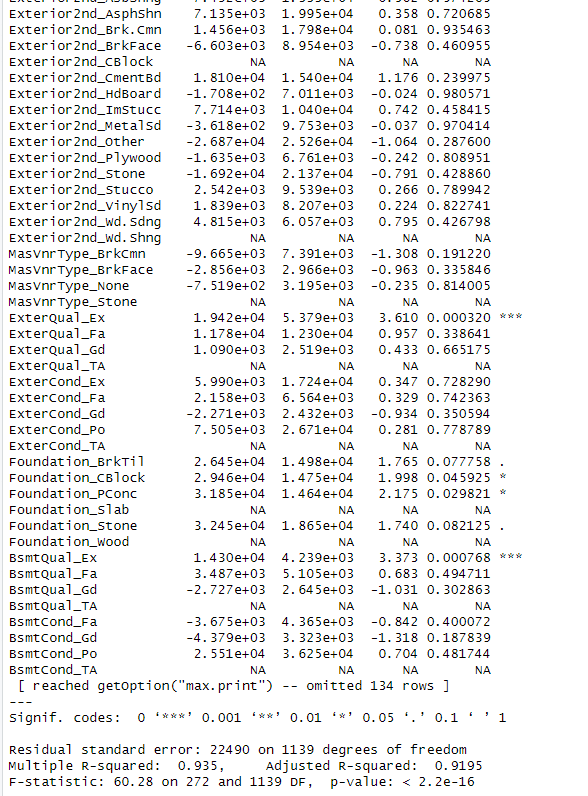

Implementing Multiple Regression

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 80559.61  87000.  ]
 [201009.44 205000.  ]
 [175774.55 178000.  ]
 [145674.05 135000.  ]
 [152824.97 143000.  ]
 [227214.51 224000.  ]
 [342542.01 326000.  ]
 [203941.52 208300.  ]
 [119594.59 104000.  ]
 [168796.14 165000.  ]
 [122202.42  90350.  ]
 [184209.51 197900.  ]
 [219838.21 232000.  ]
 [154297.81 147500.  ]
 [316862.57 318000.  ]
 [174068.22 181000.  ]
 [211386.22 215000.  ]
 [121919.97 132000.  ]
 [140625.45  84500.  ]
 [189313.14 180000.  ]
 [146706.78 143000.  ]
 [125118.87 132500.  ]
 [194159.39 178000.  ]
 [143840.12 139500.  ]
 [146148.1   89471.  ]
 [288697.07 295493.  ]
 [142993.92 145000.  ]
 [117825.84 114504.  ]
 [247936.45 190000.  ]
 [138516.75 155000.  ]
 [198159.59 172500.  ]
 [ 86222.76  85500.  ]
 [202595.87 190000.  ]
 [ 78137.47 136905.  ]
 [153993.97 112000.  ]
 [ 88375.21  87000.  ]
 [137807.26 143000.  ]
 [139935.54 175000.  ]
 [136805.58 127500.  ]
 [211231.6  179900.  ]
 [114775.58 123000.  ]
 [193732.97 175000.  ]
 [323466.78 276000.  ]
 [105711.49

In [ ]:
#dataset.to_csv('HP_dataset.csv', index = False)

After Model Building from R Studio

In [ ]:
print(X)

[[   65  8450     7 ...     0     1     0]
 [   80  9600     6 ...     0     1     0]
 [   68 11250     7 ...     0     1     0]
 ...
 [   66  9042     7 ...     0     1     0]
 [   68  9717     5 ...     0     1     0]
 [   75  9937     5 ...     0     1     0]]


In [ ]:
X.shape

(1412, 332)

In [ ]:
y.shape

(1412,)

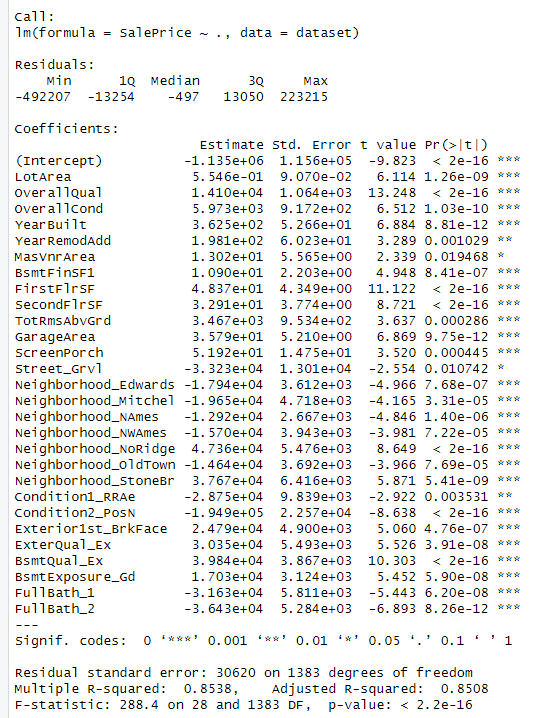

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
Rout_HP_dataset = pd.read_csv('Rout_HP.csv')

In [ ]:
Rout_HP_dataset

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,FirstFlrSF,SecondFlrSF,TotRmsAbvGrd,...,Exterior1st_BrkFace,ExterQual_Ex,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtExposure_Gd,BsmtFinType1_LwQ,FullBath_1,FullBath_2
0,8450,7,5,2003,2003,196,706,856,854,8,...,0,0,0,0,1,0,0,0,0,1
1,9600,6,8,1976,1976,0,978,1262,0,6,...,0,0,0,1,0,0,1,0,0,1
2,11250,7,5,2001,2002,162,486,920,866,6,...,0,0,0,0,1,0,0,0,0,1
3,9550,7,5,1915,1970,0,216,961,756,7,...,0,0,1,0,0,0,0,0,1,0
4,14260,8,5,2000,2000,350,655,1145,1053,9,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,7917,6,5,1999,2000,0,0,953,694,7,...,0,0,0,0,1,0,0,0,0,1
1408,13175,6,6,1978,1988,119,790,2073,0,7,...,0,0,0,1,0,0,0,0,0,1
1409,9042,7,9,1941,2006,0,275,1188,1152,9,...,0,1,0,0,0,0,0,0,0,1
1410,9717,5,6,1950,1996,0,49,1078,0,5,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
Rout_HP_dataset.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'FirstFlrSF', 'SecondFlrSF', 'TotRmsAbvGrd',
       'GarageArea', 'WoodDeckSF', 'ThreeSsnPorch', 'ScreenPorch', 'MoSold',
       'Street_Grvl', 'Utilities_AllPub', 'Neighborhood_Edwards',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_RRAe', 'Condition2_PosN', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st_BrkFace', 'ExterQual_Ex',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_LwQ', 'FullBath_1',
       'FullBath_2'],
      dtype='object')

In [ ]:
Rout_HP_dataset.shape

(1412, 41)

In [ ]:
#y = Rout_HP_dataset['SalePrice']
#X = Rout_HP_dataset.drop(['SalePrice'], axis=1)
#X = X.to_numpy()
#y = y.to_numpy()

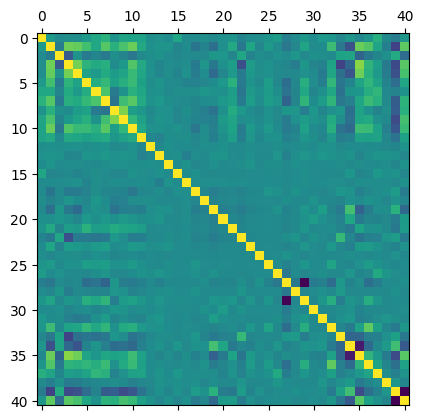

In [ ]:
plt.matshow(Rout_HP_dataset.corr())
plt.show()

Applying PCA and trying to reduce the number of columns less than 41.

In [ ]:
#from sklearn.decomposition import PCA
##pca = PCA(n_components = 1)
#pca.fit(Rout_HP_dataset)
#reduced = pca.transform(Rout_HP_dataset)

In [ ]:
#reduced.shape


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each feature

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(Rout_HP_dataset.values, i) for i in range(Rout_HP_dataset.shape[1])]

vif["features"] = Rout_HP_dataset.columns

# print VIF values

print(vif)

      VIF Factor              features
0       2.687004               LotArea
1      66.647016           OverallQual
2      43.287991           OverallCond
3   15568.809147             YearBuilt
4   16595.241600          YearRemodAdd
5       2.156600            MasVnrArea
6       3.079404            BsmtFinSF1
7      43.838100            FirstFlrSF
8       6.902650           SecondFlrSF
9      62.082963          TotRmsAbvGrd
10     11.000285            GarageArea
11      1.883458            WoodDeckSF
12      1.046463         ThreeSsnPorch
13      1.162446           ScreenPorch
14      6.626434                MoSold
15      1.090910           Street_Grvl
16   1395.886900      Utilities_AllPub
17      1.240797  Neighborhood_Edwards
18      1.129828  Neighborhood_Mitchel
19      1.802212    Neighborhood_NAmes
20      1.325711   Neighborhood_NWAmes
21      1.328213  Neighborhood_NoRidge
22      1.532537  Neighborhood_OldTown
23      1.103155  Neighborhood_StoneBr
24      1.036478       Co

In [ ]:
#VIF value below 5 is good and should be considered for further analysis
#Thats why I am deleting the columns whos VIF value is greater than 3; but I am deleting it one by one.

In [ ]:
#Dropping the below columns
Rout_HP_dataset = Rout_HP_dataset.drop(['YearRemodAdd'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['YearBuilt'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['Utilities_AllPub'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['RoofStyle_Gable'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['OverallQual'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['TotRmsAbvGrd'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['Foundation_PConc'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['OverallCond'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['FirstFlrSF'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['GarageArea'], axis=1)

In [ ]:
Rout_HP_dataset = Rout_HP_dataset.drop(['MoSold'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each feature

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(Rout_HP_dataset.values, i) for i in range(Rout_HP_dataset.shape[1])]

vif["features"] = Rout_HP_dataset.columns

# print VIF values

print(vif)

    VIF Factor              features
0     2.507353               LotArea
1     2.020506            MasVnrArea
2     2.772061            BsmtFinSF1
3     2.079641           SecondFlrSF
4     1.792639            WoodDeckSF
5     1.031435         ThreeSsnPorch
6     1.133318           ScreenPorch
7     1.070843           Street_Grvl
8     1.180975  Neighborhood_Edwards
9     1.110674  Neighborhood_Mitchel
10    1.724131    Neighborhood_NAmes
11    1.285913   Neighborhood_NWAmes
12    1.272257  Neighborhood_NoRidge
13    1.368509  Neighborhood_OldTown
14    1.061608  Neighborhood_StoneBr
15    1.027652       Condition1_RRAe
16    1.071623       Condition2_PosN
17    1.107243        RoofStyle_Flat
18    1.032263     RoofStyle_Gambrel
19    1.531235         RoofStyle_Hip
20    1.038949     RoofStyle_Mansard
21    1.116645   Exterior1st_BrkFace
22    1.588069          ExterQual_Ex
23    1.646799     Foundation_BrkTil
24    3.458386     Foundation_CBlock
25    1.792300           BsmtQual_Ex
2

After deleting the above attributes this will be dataset that will be used for further analysis.

In [ ]:
X = Rout_HP_dataset
X

,LotArea,MasVnrArea,BsmtFinSF1,SecondFlrSF,WoodDeckSF,ThreeSsnPorch,ScreenPorch,Street_Grvl,Neighborhood_Edwards,Neighborhood_Mitchel,...,RoofStyle_Mansard,Exterior1st_BrkFace,ExterQual_Ex,Foundation_BrkTil,Foundation_CBlock,BsmtQual_Ex,BsmtExposure_Gd,BsmtFinType1_LwQ,FullBath_1,FullBath_2
0,8450,196,706,854,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9600,0,978,0,298,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,11250,162,486,866,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9550,0,216,756,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,14260,350,655,1053,192,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,7917,0,0,694,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1408,13175,119,790,0,349,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1409,9042,0,275,1152,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1410,9717,0,49,0,366,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

Applying Regression Again

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[102117.    87000.  ]
 [194343.09 205000.  ]
 [190246.04 178000.  ]
 [197349.14 135000.  ]
 [151489.24 143000.  ]
 [197302.33 224000.  ]
 [338088.37 326000.  ]
 [171668.17 208300.  ]
 [109557.93 104000.  ]
 [146426.61 165000.  ]
 [140108.58  90350.  ]
 [144792.3  197900.  ]
 [191781.09 232000.  ]
 [133970.47 147500.  ]
 [336325.59 318000.  ]
 [175585.62 181000.  ]
 [188785.96 215000.  ]
 [141126.23 132000.  ]
 [123506.27  84500.  ]
 [204798.84 180000.  ]
 [171473.99 143000.  ]
 [135040.73 132500.  ]
 [255060.31 178000.  ]
 [174372.57 139500.  ]
 [118582.26  89471.  ]
 [279319.86 295493.  ]
 [161509.79 145000.  ]
 [102142.65 114504.  ]
 [286174.71 190000.  ]
 [161044.65 155000.  ]
 [219286.58 172500.  ]
 [139049.83  85500.  ]
 [166601.68 190000.  ]
 [152060.54 136905.  ]
 [159521.43 112000.  ]
 [137379.38  87000.  ]
 [129360.68 143000.  ]
 [181100.64 175000.  ]
 [162610.   127500.  ]
 [235698.97 179900.  ]
 [147393.26 123000.  ]
 [164373.9  175000.  ]
 [270439.48 276000.  ]
 [109059.91

In [ ]:
regressor.coef_

array([ 9.37e-01,  4.10e+01,  1.72e+01,  2.29e+01,  5.02e+01,  6.56e+01,
        9.86e+01, -2.50e+04, -3.26e+04, -2.80e+04, -6.76e+03, -1.81e+03,
        6.94e+04, -2.30e+04,  6.41e+04, -1.06e+04, -1.59e+05,  1.16e+04,
        1.92e+04,  9.79e+03,  1.82e+04,  4.22e+04,  7.11e+04, -2.81e+04,
       -2.75e+04,  6.15e+04,  2.47e+04, -3.70e+03, -7.60e+04, -4.57e+04])

In [ ]:
 regressor.score(X_train, y_train)

0.7535706654845011

1.   Lets apply Deep Learning Model.
2.   We will be used ANN (Artificial Neural Network) technique here



In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 500)

Epoch 1/500
36/36 [==============================] - 3s 7ms/step - loss: 39399235584.0000
Epoch 2/500
36/36 [==============================] - 0s 5ms/step - loss: 39094730752.0000
Epoch 3/500
36/36 [==============================] - 0s 4ms/step - loss: 38726062080.0000
Epoch 4/500
36/36 [==============================] - 0s 4ms/step - loss: 38278582272.0000
Epoch 5/500
36/36 [==============================] - 0s 3ms/step - loss: 37729660928.0000
Epoch 6/500
36/36 [==============================] - 0s 7ms/step - loss: 37055086592.0000
Epoch 7/500
36/36 [==============================] - 0s 6ms/step - loss: 36206927872.0000
Epoch 8/500
36/36 [==============================] - 0s 8ms/step - loss: 35186196480.0000
Epoch 9/500
36/36 [==============================] - 0s 7ms/step - loss: 33970499584.0000
Epoch 10/500
36/36 [==============================] - 0s 5ms/step - loss: 32557436928.0000
Epoch 11/500
36/36 [==============================] - 0s 5ms/step - loss: 30975791104.0000
Epoch 12

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 4ms/step
[[ 29283.79  87000.  ]
 [231488.97 205000.  ]
 [ 89117.06 178000.  ]
 [305100.31 135000.  ]
 [149330.3  143000.  ]
 [145371.36 224000.  ]
 [317803.69 326000.  ]
 [ 29348.76 208300.  ]
 [125607.81 104000.  ]
 [209966.45 165000.  ]
 [ 52710.25  90350.  ]
 [160029.83 197900.  ]
 [ 92223.64 232000.  ]
 [240589.2  147500.  ]
 [100465.75 318000.  ]
 [ 40365.04 181000.  ]
 [240453.48 215000.  ]
 [127034.09 132000.  ]
 [ 63498.52  84500.  ]
 [169326.17 180000.  ]
 [174064.77 143000.  ]
 [125081.27 132500.  ]
 [128175.33 178000.  ]
 [150969.27 139500.  ]
 [ 92959.56  89471.  ]
 [ 96933.92 295493.  ]
 [143630.58 145000.  ]
 [ 91160.9  114504.  ]
 [242551.3  190000.  ]
 [155402.89 155000.  ]
 [239770.22 172500.  ]
 [ 20060.09  85500.  ]
 [172378.48 190000.  ]
 [ 59539.17 136905.  ]
 [ 84534.42 112000.  ]
 [110462.09  87000.  ]
 [135777.05 143000.  ]
 [151980.55 175000.  ]
 [ 72848.81 127500.  ]
 [ 37273.21 179900.  ]
 [ 91171.58 123000.  ]
 [1428

As you can see the regressor score is 75% which means that R-square value is .75. Thats why we can say that this model is statistically significant and can be used for further analysis.